# ***we will work through a case study regression predictive modeling problem in Python***

## Problem Definition

Untuk proyek ini kita akan menyelidiki kumpulan data Harga Rumah Boston. Setiap record dalam database
menggambarkan pinggiran kota atau kota Boston. Data diambil dari Boston Standard Metropolitan
Area Statistik (SMSA) pada tahun 1970. 

Data dapat didownload melalui : https://www.kaggle.com/prasadperera/the-boston-housing-dataset

Deskripsi dari masing masing variabel :

-CRIM - per capita crime rate by town

-ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

-INDUS - proportion of non-retail business acres per town.

-CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

-NOX - nitric oxides concentration (parts per 10 million)

-RM - average number of rooms per dwelling

-AGE - proportion of owner-occupied units built prior to 1940

-DIS - weighted distances to five Boston employment centres

-RAD - index of accessibility to radial highways

-TAX - full-value property-tax rate per $10,000

-PTRATIO - pupil-teacher ratio by town

-B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

-LSTAT - % lower status of the population

-MEDV - Median value of owner-occupied homes in $1000's


In [4]:
# Import semua libraries yang akan digunakan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import os

In [5]:
os.listdir()

['.ipynb_checkpoints', 'Boston House Price .ipynb', 'housing.csv']

In [9]:
# Load dataset

filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Analyze Data

### Descriptive Statistics

In [10]:
# Cek shape dari dataset

dataset.shape

(506, 14)

Ada 506 data dan 14 variabel dalam dataset

In [11]:
# Cek tipe dari setiap variabel

print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


Semua variabel berbentuk numerik

In [15]:
# Deskripsi dari dataset

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


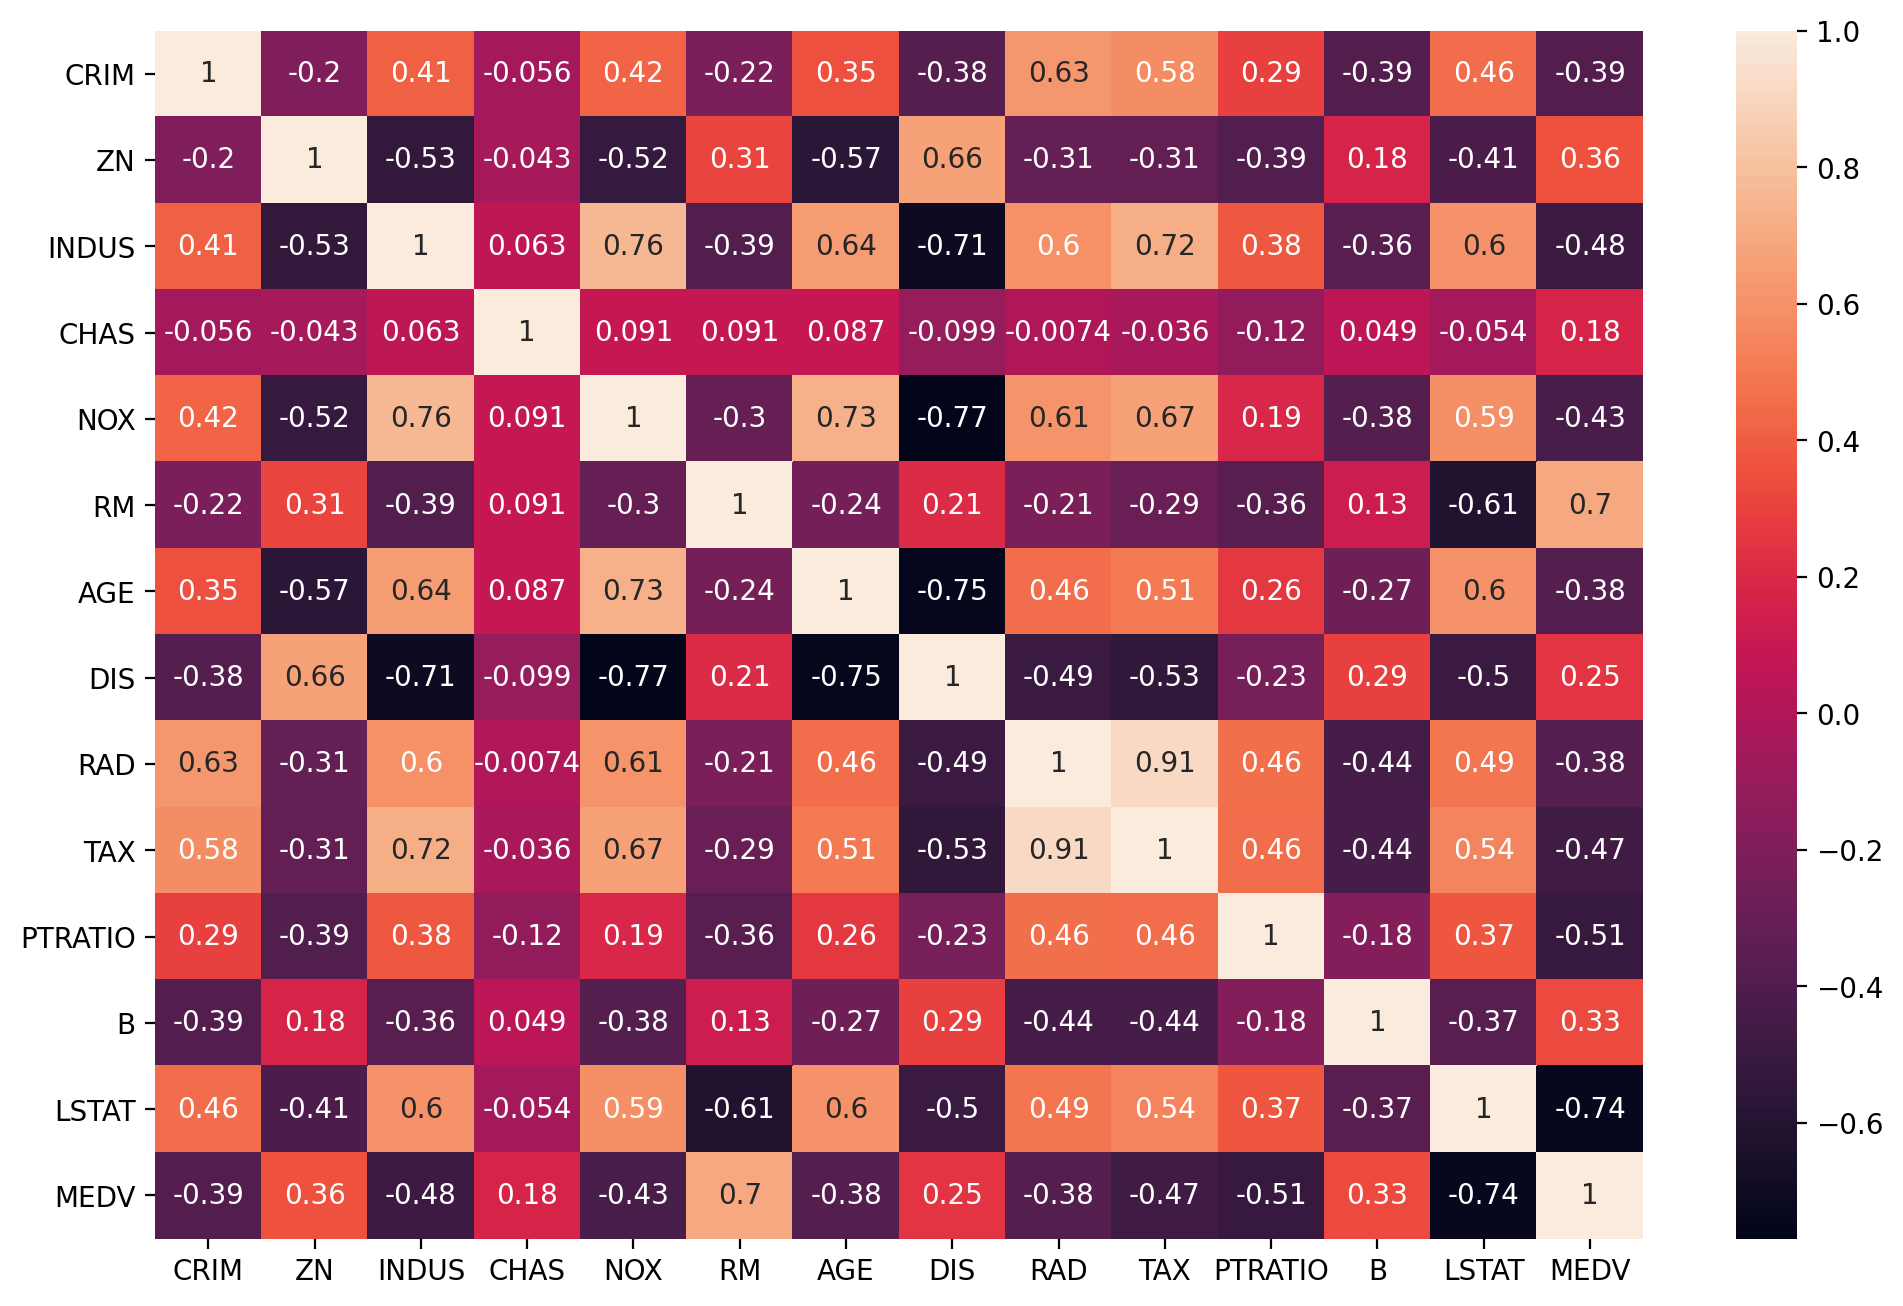

In [18]:
# Cek korelasi semua variabel

plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(dataset.corr(),annot=True);

***Dari plot diatas dapat kita lihat bahwa banyak variabel yang memiliki korelasi yang kuat dengan variabel lainnya(>0.7 atau <-0.7)***

### Data Visualization

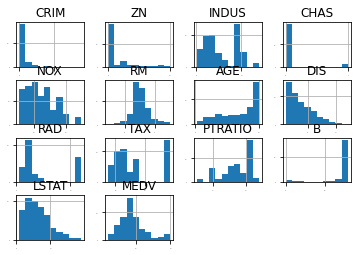

In [22]:
# Melihat distribusi dari setiap variabel

dataset.hist(sharex=False, sharey=False,xlabelsize=1,ylabelsize=1)
plt.show();

***Dapat kita lihat bahwa beberapa variabel berdistribusi eksponensial seperti variabel CRIM,ZN,AGE,B. Kita dapat melihat lainnya mungkin berdistribusi bimodal***

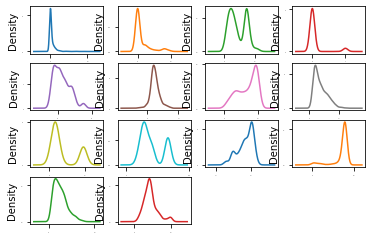

In [24]:
# Mari lihat distribusi dari masing masing menggunakan density plots 

dataset.plot(kind='density', subplots=True, layout=(4,4), sharex = False, legend = False,fontsize=1)
plt.show()

***Dapat kita lihat dengan jelas bahwa variabel RAD dan TAX berdistribusi bimodal***

***NOX,RM dan LSTAT berdistribusi skewed Gaussian***

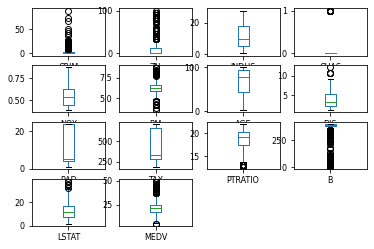

In [25]:
# Melihat data mengguanakan box dan whisker plots untuk setiap variabel

dataset.plot(kind='box', subplots=True, layout=(4,4), sharex = False,sharey = False,fontsize=8)
plt.show();

Dengan box dan whisker plots kita dapat melihat data data yang melenceng jauh dari variabel(outliers) 

### Summary of Ideas

- Kita harus melakukan Feature Selection dan menghapus the most correlated attributes

- Normalisasi data untuk mengurangi efek dari perbedaan skala pengukuran

- standarisasi dataset untuk mengurangi efek dari perbedaan distribusi

In [27]:
# Membagi dataset

X = dataset.drop(['MEDV'],axis=1).values
y = dataset['MEDV'].values
seed = 7
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

### Evaluate Algorithms: Baseline

In [29]:
#Test options and evaluation metric

num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

we will select a suite of different algorithms capable of working on this regression
problem. The six algorithms selected include:

-Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet
(EN).

-Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
Regression (SVR) and k-Nearest Neighbors (KNN).

In [30]:
# Spot-Check Algorithms

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

Semua algoritma menggunakan default tuning parameters. Let’s compare the algorithms. We will
display the mean and standard deviation of MSE for each algorithm as we calculate it and
collect the results for use later.

In [33]:
# evaluate each model in turn

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -25.251246 (18.348141)
SVR: -67.824705 (32.801530)


***Dapat kita lihat bahwa algoritma Linear Regression memiliki nilai MSE terkecil dan diikuti oleh CART***

###  Evaluate Algorithms: Standardization


Dapat diduga bahwa skala yang berbeda dari data mentah dapat berdampak negatif pada keterampilan
beberapa algoritma. Mari kita evaluasi algoritma yang sama dengan salinan standar dari
Himpunan data. Di sinilah data ditransformasikan sedemikian rupa sehingga setiap atribut memiliki nilai rata-rata nol dan simpangan baku 1. Kita juga perlu menghindari kebocoran data saat kita mentransformasikan data. Cara yang baik untuk menghindari kebocoran adalah dengan menggunakan pipeline yang menstandarisasi data dan membangun model untuk setiap fold dalam rangkaian cross validation. Dengan begitu kita bisa mendapatkan estimasi yang adil bagaimana masing-masing model dengan data standar dapat tampil pada data yang tidak terlihat. 

In [35]:
# Standardize the dataset

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -27.134819 (16.421269)
ScaledSVR: -29.570433 (18.052964)


***Dapat kita lihat bahwa scaling sangat berpengaruh terhadapa algoritma KNN, niali mse dari KNN turun drastis dari mse KNN sebelum dilakukan scaling***

### Improve Results With Tuning

Kita tahu bahwa KNN memiliki nilai mse terendah sehingga menjadikan KNN sebagai algoritma terbaik sejauh ini. Akan tetapi KNN bisa menjadi model yang lebih baik lagi dengan cara melakukan adjustment terhadap parameter k. Secara default nilai k = 7

In [41]:
# KNN Algorithm tuning

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -19.977984 using {'n_neighbors': 3}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


Dapat kita simpulakan penggunaka KNN dengan k=3 menjadi best algoritma sejauh ini.

### Ensemble Methods

Cara lain yang dapat kita lakukan untuk meningkatkan performance dalam permasalahan ini adalah menggunakan metode ensembel. Kali ini we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:

- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).

- Bagging Methods: Random Forests (RF) and Extra Trees (ET).


In [42]:
# ensembles

ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
    AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
    GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
    RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
    ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



ScaledAB: -15.599060 (8.026387)
ScaledGBM: -10.971649 (8.669286)
ScaledRF: -12.595522 (9.313422)
ScaledET: -9.163918 (6.347361)


***Dapat kita lihat bahwa kita mendapatkan skor yang lebih baik daripada algoritma linear dan nonlinier pada bagian sebelumnya.***

### Tune Ensemble Methods


In [46]:
# Tune Scaled Extra Trees Regressor

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {
        'n_estimators': range(50,126,25),
        'max_features': range(0,13)
    }
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(b

C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(b

C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(b

C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(b

C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(b

C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(b

C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(b

C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\TITA OYA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(b

Best: -8.654789 using {'max_features': 9, 'n_estimators': 125}
nan (nan) with: {'max_features': 0, 'n_estimators': 50}
nan (nan) with: {'max_features': 0, 'n_estimators': 75}
nan (nan) with: {'max_features': 0, 'n_estimators': 100}
nan (nan) with: {'max_features': 0, 'n_estimators': 125}
-14.951902 (8.592594) with: {'max_features': 1, 'n_estimators': 50}
-14.921125 (8.754451) with: {'max_features': 1, 'n_estimators': 75}
-14.757595 (8.587848) with: {'max_features': 1, 'n_estimators': 100}
-14.822463 (8.614709) with: {'max_features': 1, 'n_estimators': 125}
-11.913631 (7.239799) with: {'max_features': 2, 'n_estimators': 50}
-11.828175 (7.586987) with: {'max_features': 2, 'n_estimators': 75}
-11.503442 (7.148514) with: {'max_features': 2, 'n_estimators': 100}
-11.472383 (7.150571) with: {'max_features': 2, 'n_estimators': 125}
-9.888265 (6.103038) with: {'max_features': 3, 'n_estimators': 50}
-9.763663 (6.662990) with: {'max_features': 3, 'n_estimators': 75}
-9.697022 (6.576927) with: {'

***Best: -8.654789 using {'max_features': 9, 'n_estimators': 125}***

***Dari hasil tuning maka best hyperparameter untuk Extra Trees Regressor adalah max_features=9, n_estimators=125***

### Finalize Model


In this section we will finalize the Extra Trees Regressor model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.


In [47]:
# prepare the model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, max_features=9, n_estimators=125)
model.fit(rescaledX, y_train)

# transform the test dataset

rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))


9.845394805072184


***We can see that the estimated mean squared error is 9.845394805072184, close to our estimate of -8.654789.***
